
=== Analyzing AAPL ===


INFO: Date alignment completed successfully.
INFO: Sentiment analysis completed.
INFO: Daily metrics calculation completed.
INFO: Correlation between sentiment and returns: -0.003 (p-value: 0.876)
INFO: Visualization saved to ../results/AAPL_correlation_plot.png


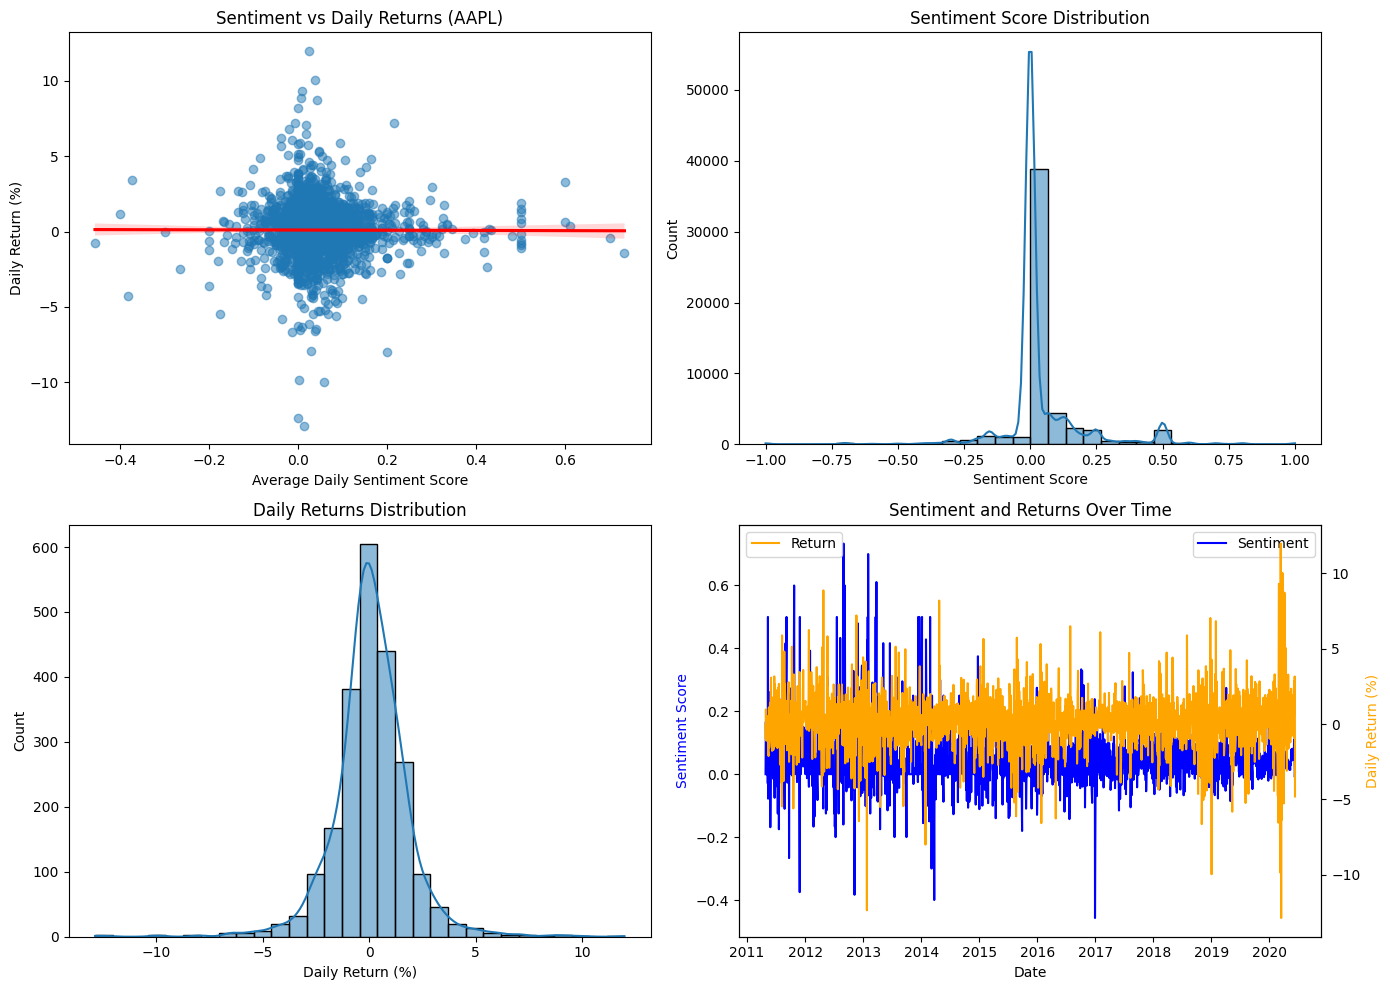


=== Analyzing AMZN ===


INFO: Date alignment completed successfully.
INFO: Sentiment analysis completed.
INFO: Daily metrics calculation completed.
INFO: Correlation between sentiment and returns: -0.014 (p-value: 0.502)
INFO: Visualization saved to ../results/AMZN_correlation_plot.png


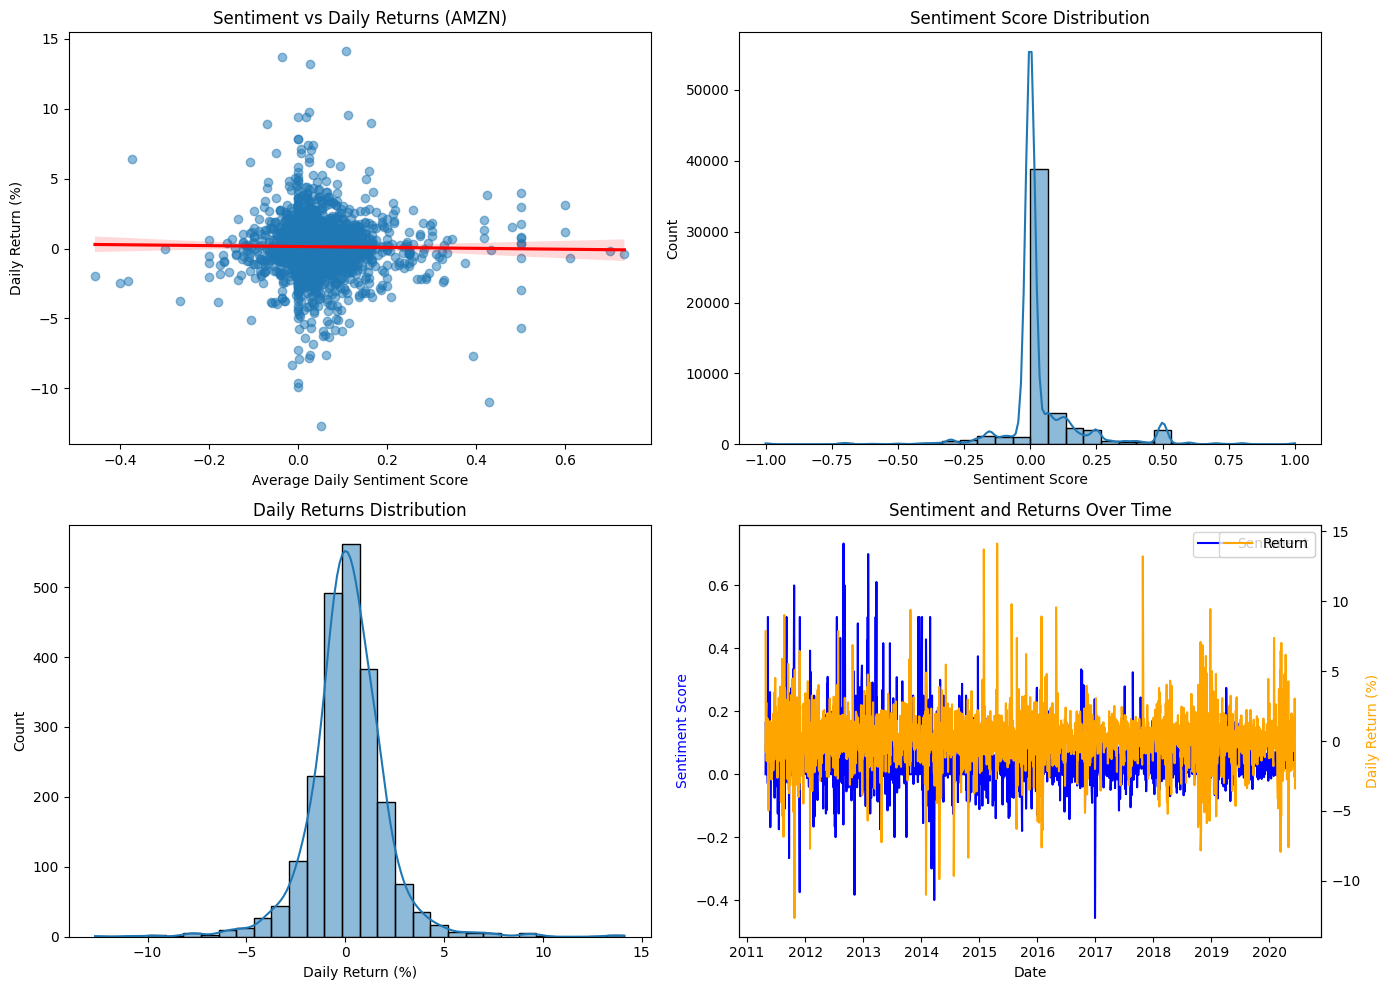


=== Analyzing GOOG ===


INFO: Date alignment completed successfully.
INFO: Sentiment analysis completed.
INFO: Daily metrics calculation completed.
INFO: Correlation between sentiment and returns: 0.014 (p-value: 0.521)
INFO: Visualization saved to ../results/GOOG_correlation_plot.png


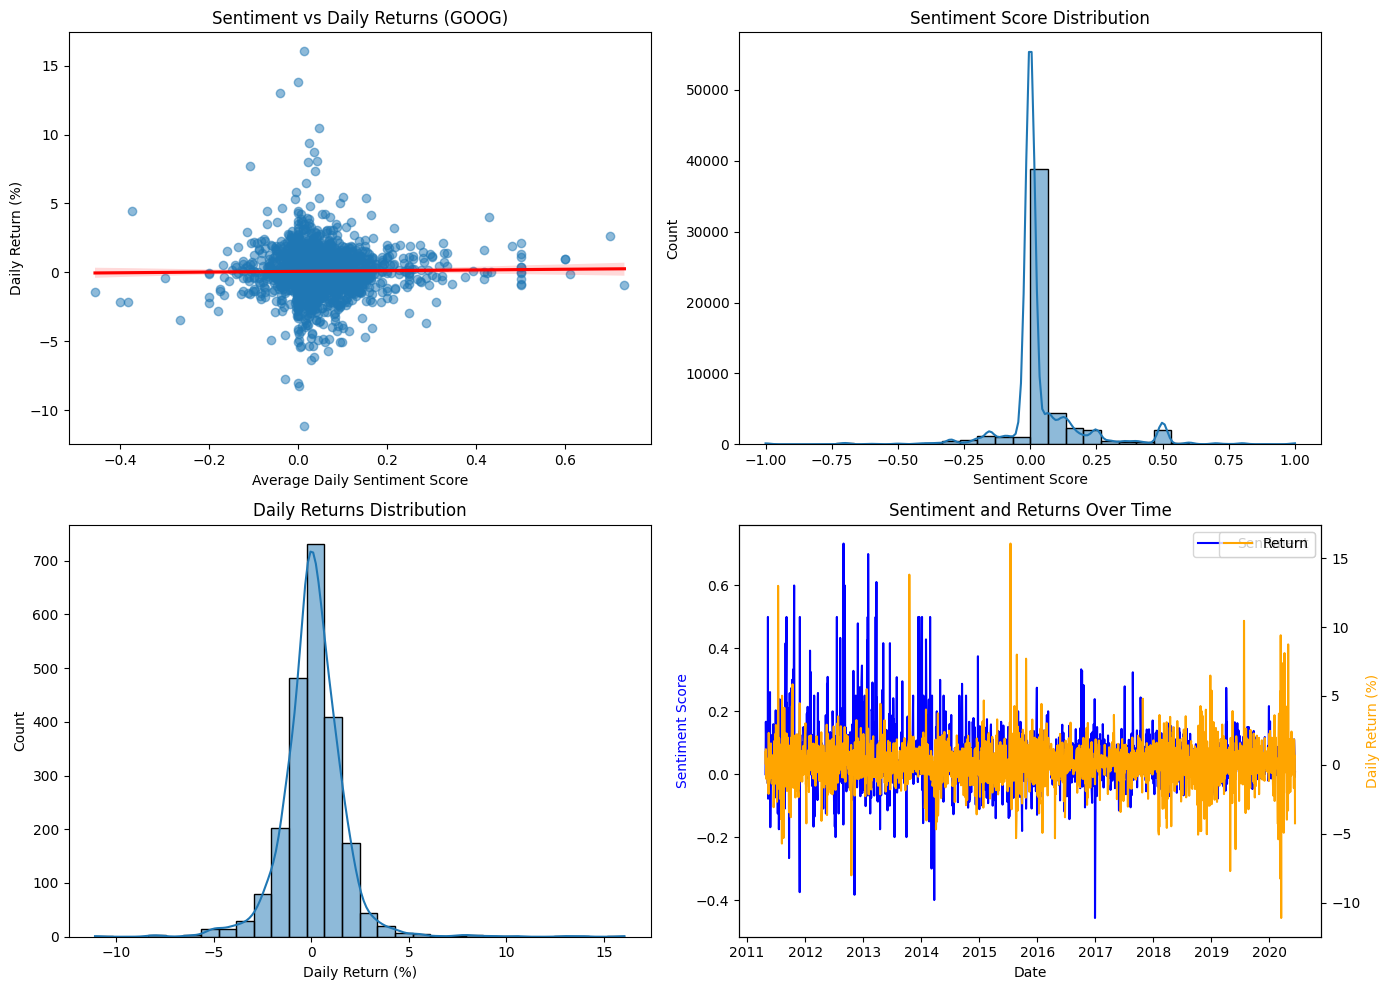


=== Analyzing META ===


INFO: Date alignment completed successfully.
INFO: Sentiment analysis completed.
INFO: Daily metrics calculation completed.
INFO: Correlation between sentiment and returns: -0.004 (p-value: 0.877)
INFO: Visualization saved to ../results/META_correlation_plot.png


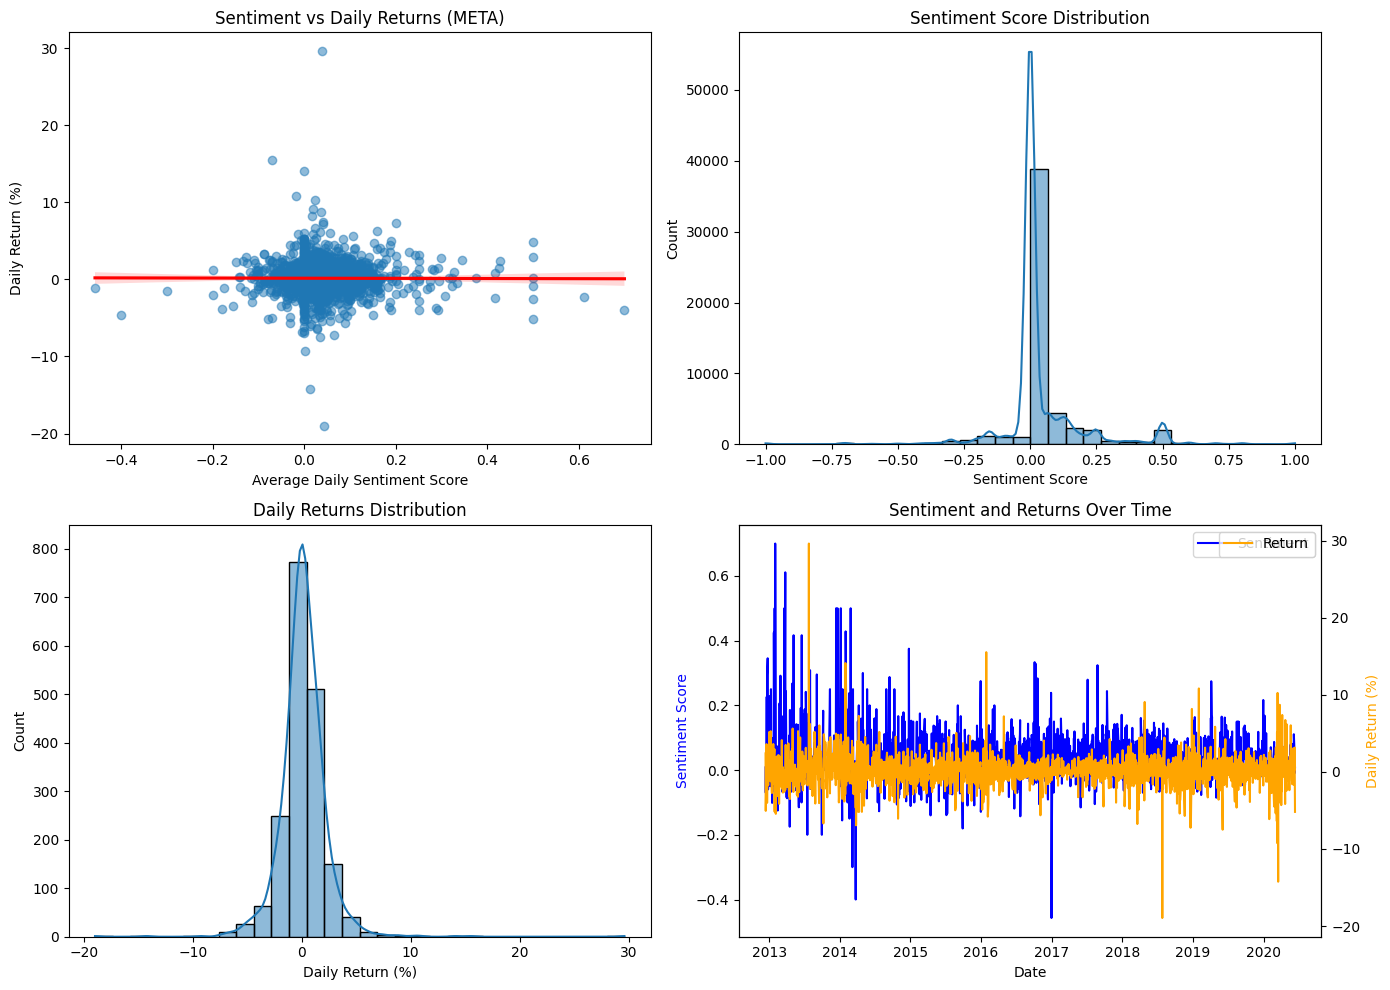


=== Analyzing MSFT ===


INFO: Date alignment completed successfully.
INFO: Sentiment analysis completed.
INFO: Daily metrics calculation completed.
INFO: Correlation between sentiment and returns: -0.012 (p-value: 0.586)
INFO: Visualization saved to ../results/MSFT_correlation_plot.png


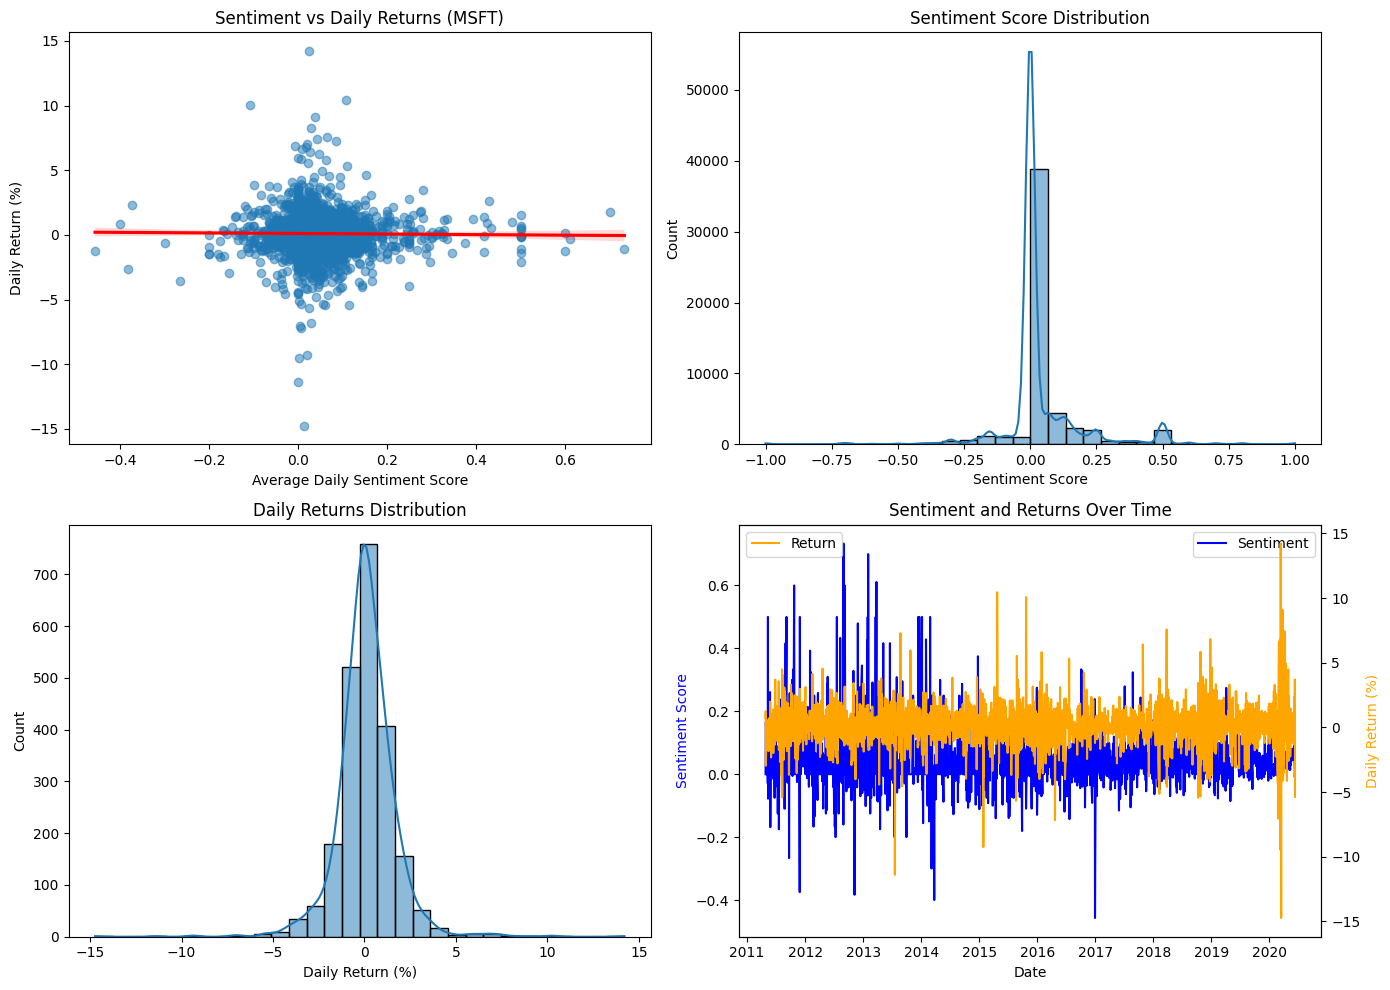


=== Analyzing NVDA ===


INFO: Date alignment completed successfully.
INFO: Sentiment analysis completed.
INFO: Daily metrics calculation completed.
INFO: Correlation between sentiment and returns: 0.011 (p-value: 0.616)
INFO: Visualization saved to ../results/NVDA_correlation_plot.png


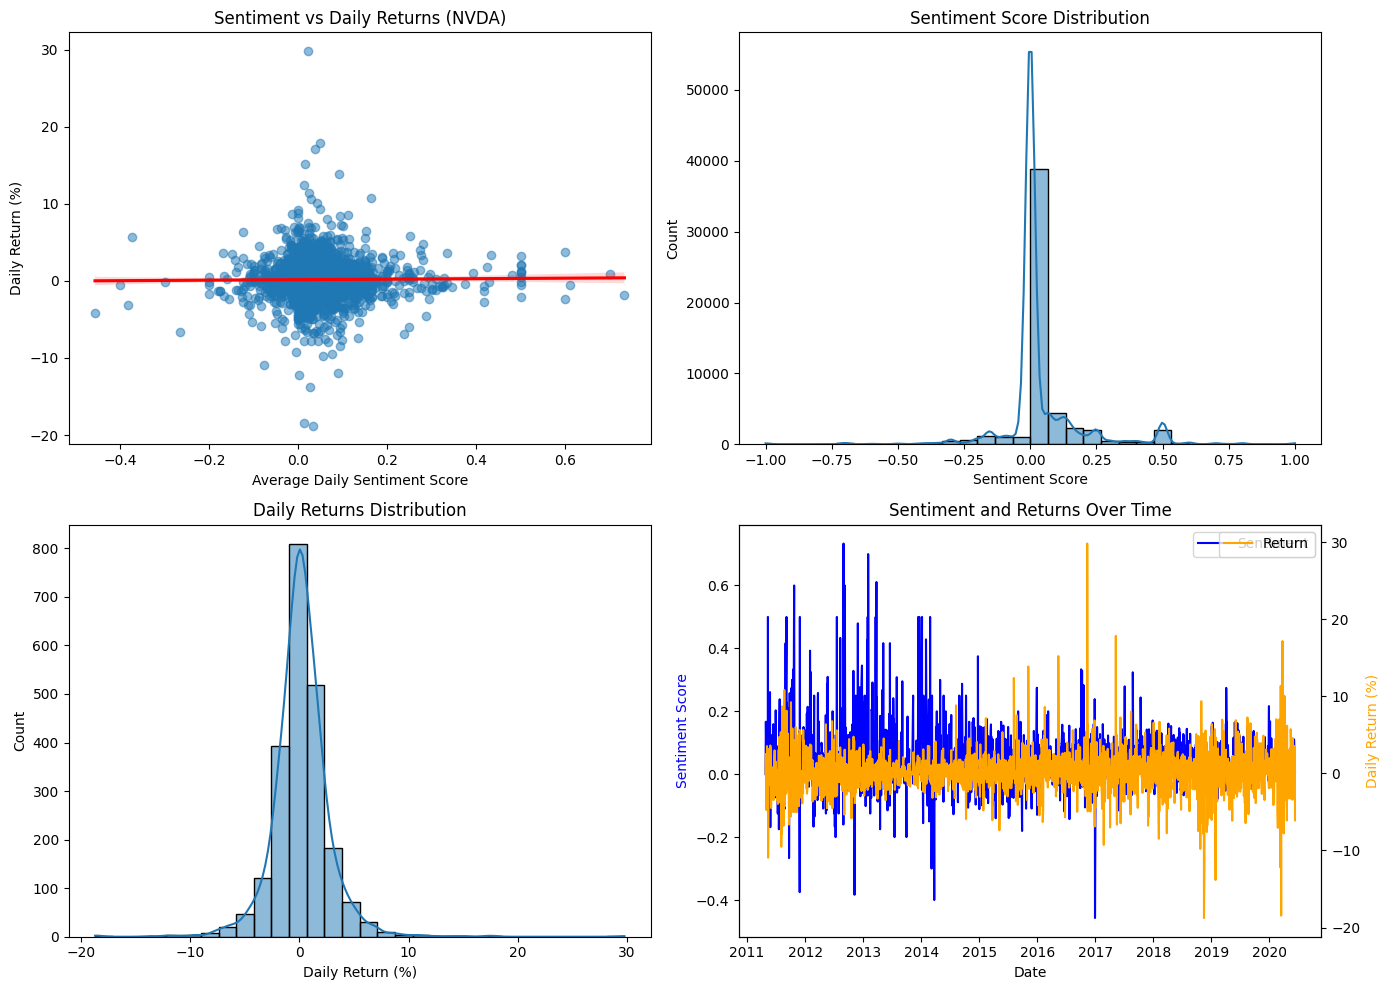


=== Analyzing TSLA ===


INFO: Date alignment completed successfully.
INFO: Sentiment analysis completed.
INFO: Daily metrics calculation completed.
INFO: Correlation between sentiment and returns: 0.026 (p-value: 0.217)
INFO: Visualization saved to ../results/TSLA_correlation_plot.png


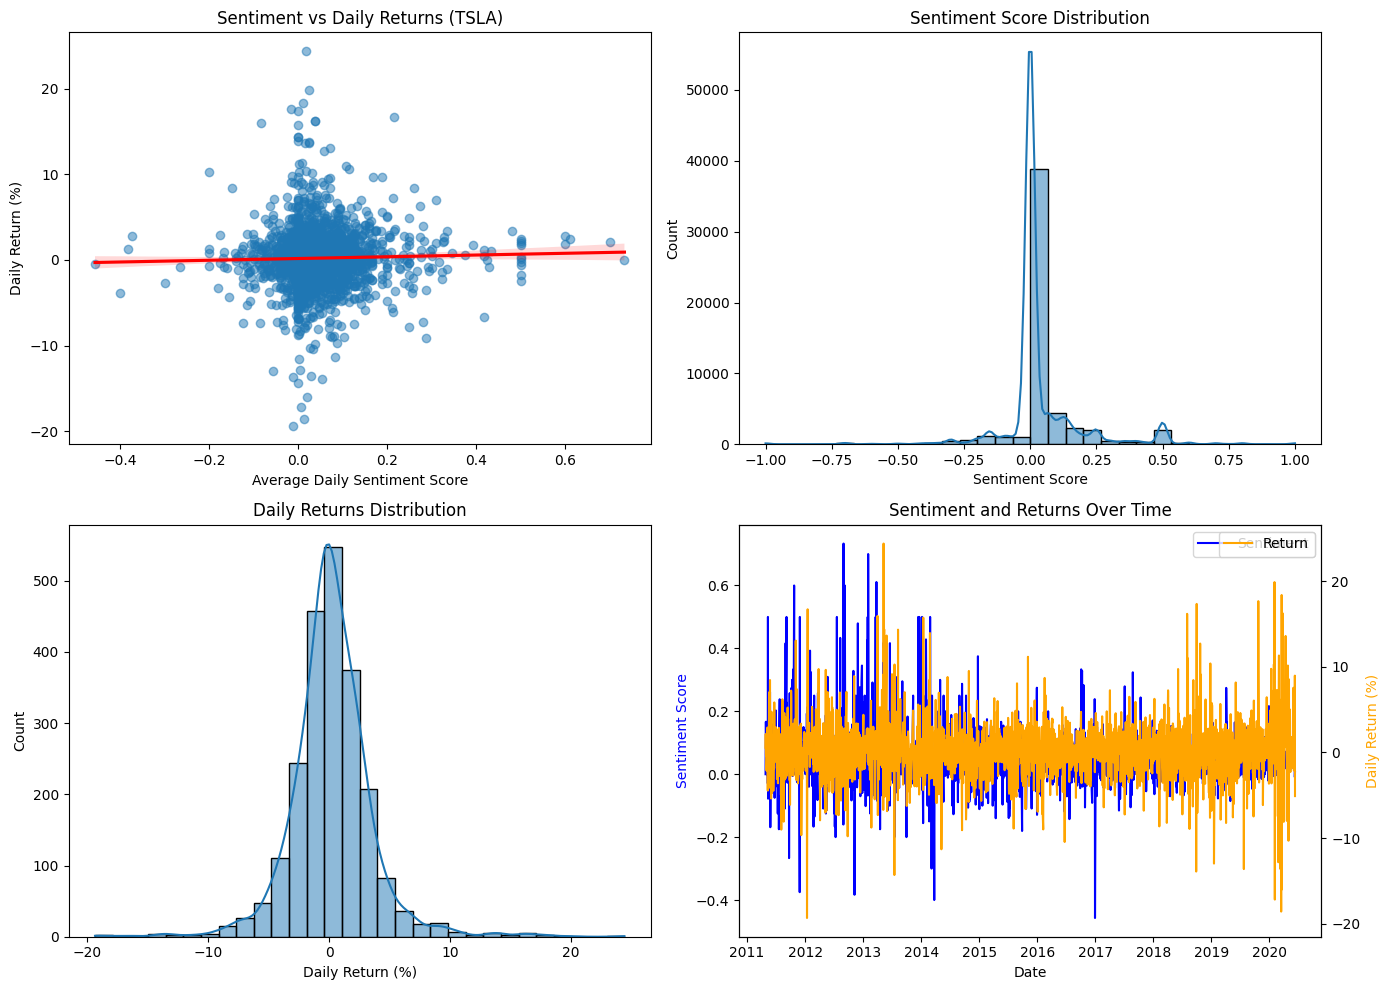


=== Analysis Summary ===
  symbol  correlation   p_value  num_observations
0   AAPL    -0.003298  0.876345              2228
1   AMZN    -0.014235  0.501858              2228
2   GOOG     0.013609  0.520836              2228
3   META    -0.003596  0.877268              1847
4   MSFT    -0.011549  0.585866              2228
5   NVDA     0.010632  0.615946              2228
6   TSLA     0.026171  0.216890              2228


In [3]:
# task3_correlation_analysis.py

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.news_stock_correlation import NewsStockCorrelation
import pandas as pd
import json

def run_analysis_for_all_symbols():
    # Configuration
    symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
    news_path = '../data/cleaned_financial_news.csv'
    results = []
    
    for symbol in symbols:
        print(f"\n=== Analyzing {symbol} ===")
        stock_path = f'../data/yfinance_data/{symbol}_historical_data.csv'
        
        # Initialize and run analysis
        analyzer = NewsStockCorrelation(news_path, stock_path, symbol)
        result = analyzer.run_analysis()
        
        results.append(result)
    
    # Save all results
    results_path = '../results/correlation_results.json'
    os.makedirs(os.path.dirname(results_path), exist_ok=True)
    with open(results_path, 'w') as f:
        json.dump(results, f, indent=2)
    
    print("\n=== Analysis Summary ===")
    summary_df = pd.DataFrame(results)
    print(summary_df[['symbol', 'correlation', 'p_value', 'num_observations']])
    
    return results

if __name__ == "__main__":
    run_analysis_for_all_symbols()